# Questions/Variables

Question 1: What factors made people more likely to survive?

Here, I'm investigating factors that made people likely to survie, I will look into this 
through 4 different varibales :
  - 1 Dependent Variable ==> Survived
  - 3 Independent Variables:  ==> Sex, Age, Pclass

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# get the data into pandas df
#'/home/matar/GitHub/Online_Courses/Udacity-ND/P02_Investigate_A_Dataset/Project/'
path = '/home/matar/GitHub/Online_Courses/Udacity-ND/P02_Investigate_A_Dataset/Project/'
titanic_pd = pd.read_csv(path + 'titanic-data.csv')

#  Overview of our dataset

In [4]:
''' see sample data '''
titanic_pd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
''' our dataset stats '''
titanic_pd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
''' let us see some numbers about our dataset '''
pd_size = titanic_pd.size
pd_counts_per_column = titanic_pd.count()
pd_survival_count = titanic_pd['Survived'].value_counts()
pd_gender_count = titanic_pd['Sex'].value_counts()
pd_class_count = titanic_pd['Pclass'].value_counts()
pd_survival_count = titanic_pd[titanic_pd['Survived']==1].count()['PassengerId']
pd_survival_mean = titanic_pd['Survived'].mean()

In [7]:
print "we have : " + str(pd_size) + " elements"
print

we have : 10692 elements



In [9]:
print "Below is counts of each column in dataset : \n" + str(pd_counts_per_column)
print

Below is counts of each column in dataset : 
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64



In [10]:
print "survial counts (0 Not-survided, 1  Survived) : \n" + str(pd_survival_count)
print

survial counts (0 Not-survided, 1  Survived) : 
342



In [11]:
print "gender counts : \n" + str(pd_gender_count)
print

gender counts : 
male      577
female    314
Name: Sex, dtype: int64



In [12]:
print "class count : \n" + str(pd_class_count)
print

class count : 
3    491
1    216
2    184
Name: Pclass, dtype: int64



In [13]:
print 'survival count : ' + str(pd_survival_count)

survival count : 342


In [14]:
print "About " + str((pd_survival_mean * 100)) + " % of the passangers survived"

About 38.3838383838 % of the passangers survived


# Factors to analyze

## Age

In [10]:
''' let us take a look at Age stats '''
titanic_pd['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
''' check if we have missing values in Age column '''
titanic_pd['Age'].isnull().sum()

177

we can see that we have 177 missing age values,

I need to fix those missing values,

I'll fix them by filling them with mean of the age using fillna()

In [13]:
''' fixing missing values in age'''
titanic_pd_age = titanic_pd # get a new datafram to maintain our primary df
age_mean = titanic_pd_age['Age'].mean()

titanic_pd_age['Age'] = titanic_pd_age['Age'].fillna(age_mean)

In [14]:
''' check again to make sure we have no more missing age values'''
titanic_pd_age['Age'].isnull().sum()

0

In [15]:
'''let us age stats after fixing missing values '''
titanic_pd_age.describe()['Age']

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
''' let us see a sample of age values recurrence '''
titanic_pd_age['Age'].value_counts().head(10)

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
30.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
Name: Age, dtype: int64

We have many age values recurrence which make it hard to anayze,so I am going group ages into 3 groups as below :

        age >= 50.0 THEN 'Old'
        age >= 19.0 THEN 'Young'
        else THEN 'childern'
- I will implment that by creating pd Series, then apply my logic on it,
- Then add that pd Series to pd

In [17]:
''' age groups'''
pd_age_series = pd.Series(titanic_pd_age['Age'])

def age_groups(age):
    if age >= 50.0 :
        return 'Old'
    elif age >= 19.0 :
        return 'Young'
    else :
        return 'Children'
pd_age_series.apply(age_groups)

titanic_pd_age['Age_group'] = pd_age_series.apply(age_groups)

In [18]:
''' sample of pd '''
titanic_pd_age.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Young
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,Young
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Old
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Children
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Young
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Children


In [21]:
''' Now, let us see survival distribution across age groups '''

survival_age = titanic_pd_age[titanic_pd_age['Survived']==1]
survival_age = survival_age.groupby('Age_group').count()['PassengerId']
survival_age

Age_group
Children     70
Old          27
Young       245
Name: PassengerId, dtype: int64

Populating the interactive namespace from numpy and matplotlib


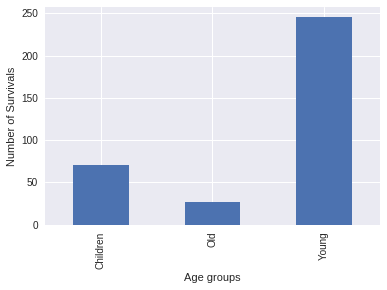

In [22]:
'''  plotting '''
%pylab inline
myPlot = survival_age.plot(kind='bar')
myPlot.set_xlabel('Age groups')
myPlot.set_ylabel('Number of Survivals')

From prevoise calculation and plotting, we can se most of the survivals are between 19 and 49 years old

## Sex

In [23]:
''' let us see Sex distribtuion on the ship '''
Sex_count = titanic_pd_age['Sex'].value_counts()
Sex_count

male      577
female    314
Name: Sex, dtype: int64

In [24]:
''' let see Sex percentage on the ship'''
Sex_percentage = (titanic_pd_age['Sex'].value_counts() / titanic_pd_age.count()['PassengerId'])*100
Sex_percentage = pd.DataFrame(Sex_percentage)
Sex_percentage

,Sex
male,64.758698
female,35.241302


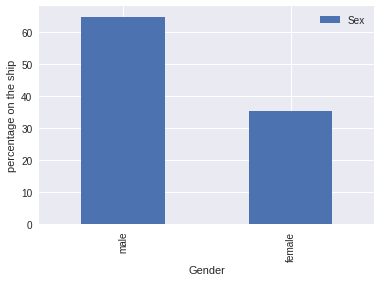

In [25]:
''' viz our result '''
#Sex_percentage.plot(Sex_percentage['Sex'], kind='bar')
myPlot = Sex_percentage.plot( kind='bar')
myPlot.set_xlabel('Gender')
myPlot.set_ylabel('percentage on the ship')

In [26]:
''' let us see what is the survival portion based on Sex '''
survival_sex = titanic_pd_age[titanic_pd_age['Survived']==1]
survival_sex = survival_sex.groupby('Sex').count()['PassengerId']
survival_sex = (survival_sex / pd_survival_count) * 100
print str(survival_sex[0]) + " % of " + str(pd_survival_count) + " passangers who survived were famles"
print str(survival_sex[1]) + " % of " + str(pd_survival_count) + " passangers who survived were males"

68.1286549708 % of 342 passangers who survived were famles
31.8713450292 % of 342 passangers who survived were males


## Pclass

In [27]:
''' let see passangers distrubtion across the different classes'''
titanic_pd_age.groupby('Pclass')['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [28]:
''' let see survivals count across the different classes'''
titanic_pd_age.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [29]:
''' let see average survival portion across the different calsses'''
Survived = titanic_pd_age.groupby('Pclass')
Survived = Survived.mean()['Survived']
Survived = pd.DataFrame(Survived)
Survived

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


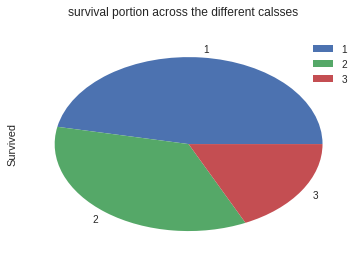

In [30]:
myPlot = Survived.plot(Survived, kind='pie',subplots=True,
                       title='survival portion across the different calsses')


Boarding on class 1 was a majore factor to survive on Titainc according to above calculation.

We can see here that passangers on Class 1 got about 62.96 % chance of survival comapring 
to other passnagers on the lower classes.

In [31]:
# -------------------------------- finally, let's take a look into all variables together 
survival_factors = titanic_pd_age[titanic_pd_age['Survived']==1]
survival_factors = survival_factors.groupby(['Survived','Pclass', 'Sex', 'Age_group']).count()['PassengerId']
survival_factors

Survived  Pclass  Sex     Age_group
1         1       female  Children     10
                          Old          14
                          Young        67
                  male    Children      4
                          Old           6
                          Young        35
          2       female  Children     14
                          Old           5
                          Young        51
                  male    Children      9
                          Old           1
                          Young         7
          3       female  Children     22
                          Old           1
                          Young        49
                  male    Children     11
                          Young        36
Name: PassengerId, dtype: int64

# limitations of the analysis

- The provided data is only sample of passangers (891 passanger). According to Wikipedia, total number of  passangers and crew on Titanic was about 2224.
- In this analysis, I only looked inot survival likelihood using 3 independent factors. I could've exploered more independent varibales, for example :
    - SibSp varibable : was it likely to survive if passanger has Sibiling/spouse on the ship?
    - Parch varibable : was it likely to survive if passanger has parents/childern on the ship?
    - Embarked varibable
- we have a lot of missing values :
    - We do not know Age values of 177 passanger
    - We do not know Cabin values of Cabin 687 passanger
    - We do not know Embarked values of Embarked 2 passanger
- Since Age is the only variable I used form those above, I handled the missing values in age by passing mean of ages to the null values.

# Conclusions

#### We have 891 passangers in our dataset, where 64.76 % of them are males and 35.24 % were females.
-  342 of the passangers survided which represents 38.38 % of total passangers.
    - 68.13 % of survivals were famles 
    - 31.87 % of survivals were males
    
- The passangers' ages range from 4 months year old to 80 years old.
- I found out passangers who between 19 and 49 age were likely to survive.
- 62.96 % of the survivals boarded on class 1

#### We see strong correlation between passanger's sex and the chance of survival, and we belive passangers on class 1 were likleu to survive survive.
#### Being a female in age between 19 and 49 and boarding on Class 1 was the most significant combination to survive Titanic tragedy


In [44]:
# Web sites I visited while working on my project
'''
https://chrisalbon.com/python/pandas_index_select_and_filter.html
http://pandas.pydata.org/pandas-docs/stable/index.html
https://www.youtube.com/watch?v=LHeNrY1jGO8


'''

'\nhttps://chrisalbon.com/python/pandas_index_select_and_filter.html\nhttp://pandas.pydata.org/pandas-docs/stable/index.html\nhttps://www.youtube.com/watch?v=LHeNrY1jGO8\n\n\n'